<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cointegration,-heatmap" data-toc-modified-id="Cointegration,-heatmap-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cointegration, heatmap</a></span></li></ul></div>

- timezone: EST (currently: -6)  
New York Stock Exchange (NYSE) and the Nasdaq Stock Market (Nasdaq), are 9:30 a.m. to 4 p.m.

In [3]:
# distance matrix
# correlation distance
import pandas as pd
from pathlib import Path
path = Path(r'd:/data/stock_data/Helden')
heldenStocks = ['SPY','AAL', 'AAPL', 'ADI', 'ADSK', 'AMGN', 'AMZN', 'BIDU', 'BKNG', 'BMRN', 'CERN', 'CHTR', 'COST', 'CSCO', 'CSX', 'CTAS', 'CTXS', 'DISH', 'EA', 'EBAY', 'EXPE', 'FB', 'FOX', 'GOOGL', 'HAS', 'HOLX', 'INTC', 'INTU', 'JBHT', 'JD', 'LRCX', 'MCHP', 'MNST', 'MSFT', 'MU', 'NFLX', 'NTES', 'NVDA', 'ORLY', 'PCAR', 'PYPL', 'QCOM', 'SBUX', 'SIRI', 'STX', 'TMUS', 'TSLA', 'TXN', 'ULTA', 'VOD', 'VRSK', 'VRTX', 'WBA', 'WDC', 'BABA', "GME", 'AXP','BA','CAT','CVX','DIS','GE','GS','HD','IBM','JNJ','JPM','KO','MCD','MRK','NKE','PTE','PG','TRV','UNH','V','VZ','WMT','XOM']

for i in range(len(heldenStocks)):

    ticker = heldenStocks[i]

    df1 = pd.read_csv(path / f'{ticker}-1-1.csv')[['time','close']]
    df2 = pd.read_csv(path /f'{ticker}-1-2.csv')[['time','close']]

    locals()[ticker] = pd.concat([df1,df2]) #.set_index('time')
    locals()[ticker].columns = ['time',ticker]

    if i>0:
        stockData = pd.merge(stockData, locals()[ticker], on = 'time', how = 'outer')
    else:
        stockData = locals()[ticker]
    del locals()[ticker]


print(stockData.shape)  


(35674, 80)


In [7]:
stockData['time'] = pd.to_datetime(stockData['time'])

stocks = stockData.set_index('time')
stocks = stocks.between_time('9:30', '16:00')
stocks.to_csv('StocksSelectedHours.csv')

In [3]:
# stockData['Date'] = pd.to_datetime(stockData['time']).dt.date
# stockData['Time'] = pd.to_datetime(stockData['time']).dt.time

In [8]:
corr_distance_matrix = stocks.corr()

In [9]:
corr_distance_matrix

,SPY,AAL,AAPL,ADI,ADSK,AMGN,AMZN,BIDU,BKNG,BMRN,...,MRK,NKE,PTE,PG,TRV,UNH,V,VZ,WMT,XOM
SPY,1.000000,-0.150766,0.664561,0.943056,0.795816,0.871081,0.214384,0.858366,0.593429,0.373156,...,0.465277,0.672939,0.821549,-0.439500,0.866207,0.782713,-0.138938,-0.812249,-0.304643,0.861880
AAL,-0.150766,1.000000,-0.165660,-0.216983,-0.275806,-0.047168,-0.184216,-0.242341,-0.225712,-0.184748,...,0.126493,-0.164352,-0.314749,-0.145620,-0.026496,-0.293242,-0.144763,0.389176,-0.234919,0.049293
AAPL,0.664561,-0.165660,1.000000,0.543582,0.690485,0.406495,0.617957,0.742434,0.442807,0.712365,...,-0.084208,0.664746,0.341116,-0.211028,0.711895,0.367680,0.114850,-0.700476,-0.675472,0.410360
ADI,0.943056,-0.216983,0.543582,1.000000,0.852531,0.852624,-0.026472,0.884722,0.589331,0.274457,...,0.506576,0.678808,0.905140,-0.420993,0.808986,0.757330,-0.235251,-0.871847,-0.280687,0.912203
ADSK,0.795816,-0.275806,0.690485,0.852531,1.000000,0.560262,0.071047,0.898308,0.663857,0.579426,...,0.215085,0.876508,0.731012,-0.117197,0.705191,0.575959,-0.033349,-0.894191,-0.509458,0.736180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNH,0.782713,-0.293242,0.367680,0.757330,0.575959,0.601864,0.007339,0.529196,0.748448,0.065486,...,0.679118,0.546653,0.755046,-0.100624,0.476912,1.000000,0.151297,-0.546806,0.027739,0.573788
V,-0.138938,-0.144763,0.114850,-0.235251,-0.033349,-0.462216,0.279432,-0.186646,0.472733,0.137586,...,-0.011976,0.132765,-0.292578,0.657898,-0.371792,0.151297,1.000000,0.164903,0.081564,-0.446268
VZ,-0.812249,0.389176,-0.700476,-0.871847,-0.894191,-0.672576,-0.158321,-0.948814,-0.546572,-0.459018,...,-0.210324,-0.709278,-0.804497,0.350212,-0.788105,-0.546806,0.164903,1.000000,0.468644,-0.768132
WMT,-0.304643,-0.234919,-0.675472,-0.280687,-0.509458,-0.209277,-0.285823,-0.561797,-0.226202,-0.678146,...,0.209632,-0.446320,-0.053238,0.234888,-0.525217,0.027739,0.081564,0.468644,1.000000,-0.301598


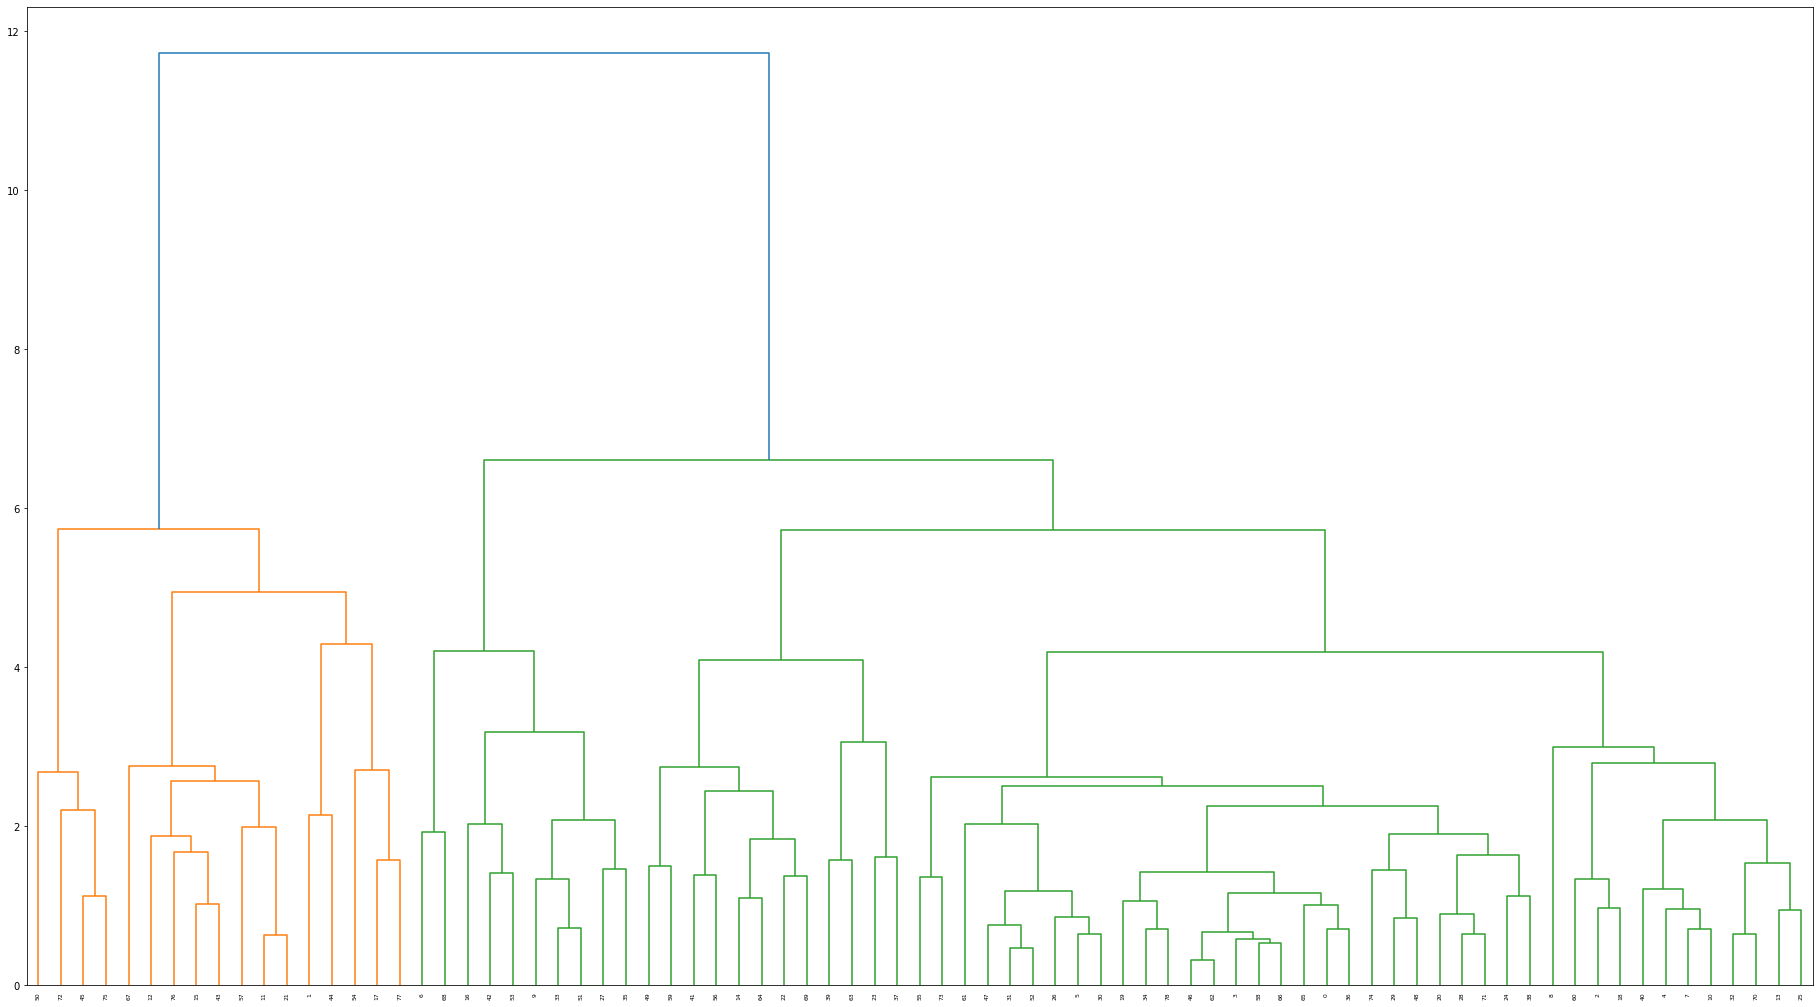

In [10]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import single, complete, average, dendrogram
z = complete(corr_distance_matrix)

fig = plt.figure(figsize = (32,18))
dn = dendrogram(z)
plt.show()

As we can see there are two very dissimilar clusters in this dataset

In [14]:
x = single(corr_distance_matrix)
x[:4]

array([[46.        , 62.        ,  0.31870763,  2.        ],
       [ 3.        , 79.        ,  0.43255146,  3.        ],
       [31.        , 52.        ,  0.46264108,  2.        ],
       [66.        , 80.        ,  0.49870041,  4.        ]])

In [ ]:
linkage_matrix = complete(corr_distance_matrix)
linkage_matrix[:3]

In [32]:
from scipy.cluster.hierarchy import fcluster
import numpy as np
cluster_labels = fcluster(linkage_matrix, 2, criterion = 'maxclust')
print(np.unique(cluster_labels))

[1 2]


In [33]:
cluster_labels

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2], dtype=int32)

In [43]:
# hand select the appropriate cut-off on the dendogram
cluster_labels2 = fcluster(linkage_matrix, 3, criterion = 'distance')
len(cluster_labels2)

79

# Cointegration, heatmap 

In [44]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

C:\Users\nehes\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [63]:
def find_cointegrated_pairs(data):
    data = data[:5]
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [47]:
trueStocks = stocks.iloc[::-1]

In [57]:
trueStocks.fillna(method = 'ffill', inplace = True)
trueStocks.dropna(inplace = True)

In [58]:
trueStocks.shape

(14503, 79)

In [60]:
trueStocks.to_csv('79Stocks2Months.csv')

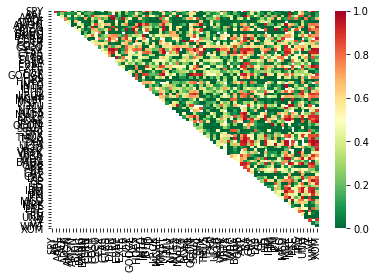

[('SPY', 'AAPL'), ('SPY', 'AMZN'), ('SPY', 'BKNG'), ('SPY', 'CERN'), ('SPY', 'CSCO'), ('SPY', 'CTXS'), ('SPY', 'FB'), ('SPY', 'HAS'), ('SPY', 'INTC'), ('SPY', 'LRCX'), ('SPY', 'MU'), ('SPY', 'NTES'), ('SPY', 'PYPL'), ('SPY', 'STX'), ('SPY', 'WBA'), ('SPY', 'WDC'), ('SPY', 'GME'), ('SPY', 'GS'), ('SPY', 'HD'), ('SPY', 'IBM'), ('SPY', 'JPM'), ('SPY', 'KO'), ('SPY', 'MCD'), ('SPY', 'NKE'), ('SPY', 'PG'), ('SPY', 'V'), ('SPY', 'XOM'), ('AAL', 'BMRN'), ('AAL', 'CSCO'), ('AAL', 'CSX'), ('AAL', 'CTAS'), ('AAL', 'CTXS'), ('AAL', 'EBAY'), ('AAL', 'FB'), ('AAL', 'INTU'), ('AAL', 'JBHT'), ('AAL', 'MCHP'), ('AAL', 'MNST'), ('AAL', 'ORLY'), ('AAL', 'SIRI'), ('AAL', 'STX'), ('AAL', 'TMUS'), ('AAL', 'WDC'), ('AAL', 'AXP'), ('AAL', 'BA'), ('AAL', 'DIS'), ('AAL', 'HD'), ('AAL', 'JNJ'), ('AAL', 'MCD'), ('AAL', 'MRK'), ('AAL', 'PTE'), ('AAL', 'WMT'), ('AAPL', 'ADSK'), ('AAPL', 'AMZN'), ('AAPL', 'CERN'), ('AAPL', 'EBAY'), ('AAPL', 'FB'), ('AAPL', 'FOX'), ('AAPL', 'INTC'), ('AAPL', 'MNST'), ('AAPL', 'MU'),

In [66]:
instrumentIds = heldenStocks
scores, pvalues, pairs = find_cointegrated_pairs(trueStocks)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=instrumentIds, 
                yticklabels=instrumentIds, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.98)
                )
plt.show()
print(pairs)